In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
mainpath = "/Users/soldash/Documents/Tesis/python/Datos/Todas/" #ruta de Carga de los datos
filename = "dataframe_concatenado1.csv" #Nombre del archivo a cargar

In [3]:
data = pd.read_csv(mainpath+filename, sep=",")
dummy_df = pd.get_dummies(data, columns=['Seizure'])
dummy_df

,ECG,Time,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF,Seizure_0,Seizure_1,Seizure_2
0,-103.76,2022-07-01 13:25:10.520,664,159.342208,90,1.472363,15,46.875000,1405.554118,1806.423996,7091.854690,1.285204,0,0,1
1,13.07,2022-07-01 13:25:17.080,712,164.505513,90,1.209623,17,50.000000,2767.162779,4630.892866,23767.740430,1.673517,0,0,1
2,-56.95,2022-07-01 13:25:19.080,532,189.341631,91,1.145864,20,54.054054,2944.626153,4952.310225,26649.719756,1.681813,0,0,1
3,83.24,2022-07-01 13:25:16.380,784,164.551134,91,1.242441,17,50.000000,2579.758213,4204.472971,21965.273563,1.629793,0,0,1
4,162.54,2022-07-01 13:25:06.880,682,124.109148,88,1.400575,13,41.935484,572.531005,1497.050280,4298.146616,2.614793,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221795,-20.52,2022-07-02 02:13:48.750,970,451.274655,53,1.346061,12,54.545455,35491.245417,69588.665643,208801.680408,1.960728,1,0,0
221796,22.61,2022-07-02 02:14:16.100,990,251.018848,54,0.627083,11,47.826087,28219.195897,85672.850272,285006.461062,3.035978,1,0,0
221797,-226.50,2022-07-02 02:16:04.100,1525,236.765646,57,0.502655,12,52.173913,9265.808753,12742.977193,74454.898631,1.375269,1,0,0
221798,-35.91,2022-07-02 02:13:52.450,1425,212.634752,54,1.025225,12,54.545455,38532.339011,73043.033828,223054.480452,1.895629,1,0,0


Tamaño de muestras preictales :73879


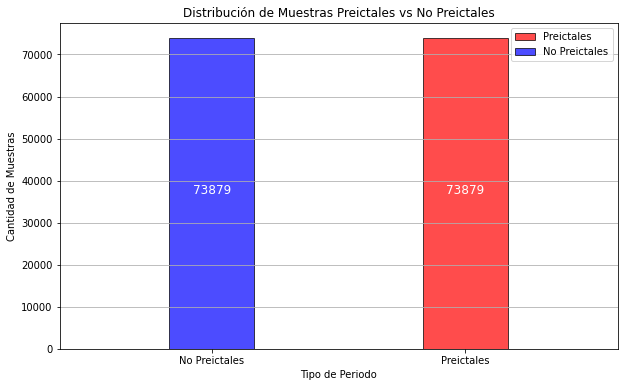

In [4]:
import matplotlib.pyplot as plt

# Igualar muestras
sample_size = dummy_df[dummy_df["Seizure_1"] == 1].shape[0]
print("Tamaño de muestras preictales :" + str(sample_size))

preictal = dummy_df[dummy_df["Seizure_1"] == 1]
other = dummy_df[dummy_df["Seizure_1"] == 0]

preictal_data = preictal.sample(n=sample_size)
other_data = other.sample(n=sample_size)

Sample = pd.concat([preictal_data, other_data], axis=0)

# Crear histograma
plt.figure(figsize=(10, 6))

# Datos para Preictales
plt.hist(preictal_data["Seizure_1"], bins=3, edgecolor='black', alpha=0.7, color='red', label='Preictales')

# Datos para No Preictales
plt.hist(other_data["Seizure_1"], bins=3, edgecolor='black', alpha=0.7, color='blue', label='No Preictales')

plt.title("Distribución de Muestras Preictales vs No Preictales")
plt.xlabel("Tipo de Periodo")
plt.ylabel("Cantidad de Muestras")
plt.xticks([0, 1], ['No Preictales', 'Preictales'])
plt.grid(axis='y')
plt.legend()

# Añadir anotaciones
preictal_count = sum(Sample["Seizure_1"])
non_preictal_count = len(Sample["Seizure_1"]) - preictal_count
plt.text(0.0, non_preictal_count/2, str(non_preictal_count), color='white', fontsize=12, ha='center')
plt.text(1.0, preictal_count/2, str(preictal_count), color='white', fontsize=12, ha='center')

plt.show()


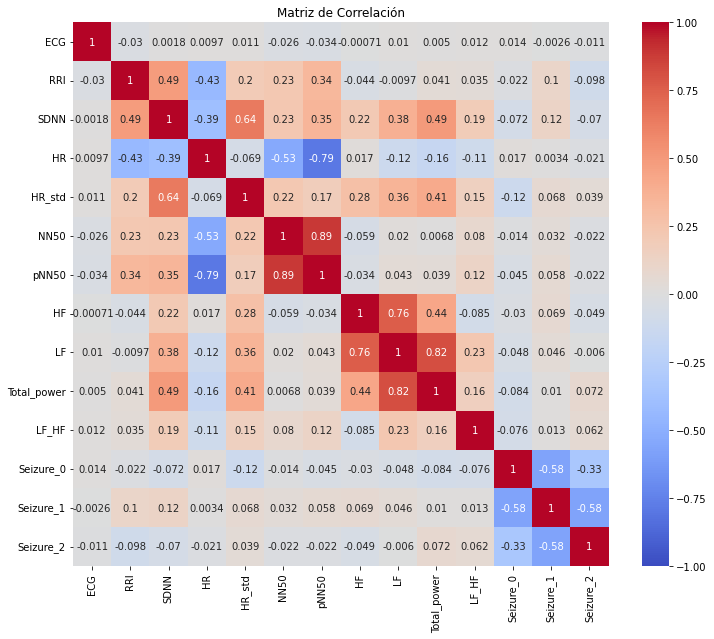

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumo que ya tienes tu DataFrame cargado como 'Sample'
correlation_matrix = Sample.corr()

# Establecer el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()

In [6]:
Sample

,ECG,Time,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF,Seizure_0,Seizure_1,Seizure_2
46816,-17.09,2022-07-01 10:41:41.400,1355,232.060862,58,1.021119,5,41.666667,3300.691563,10864.325015,38061.232870,3.291530,0,1,0
216404,-18.32,2022-07-01 11:14:20.900,860,224.624330,58,1.173929,8,66.666667,5465.828521,20309.113642,41298.705383,3.715651,0,1,0
178685,-76.16,2022-07-01 15:50:43.740,654,82.326964,101,1.351617,4,13.333333,28766.038031,33849.136749,131641.657108,1.176705,0,1,0
56816,158.48,2022-07-01 13:24:06.900,644,15.241923,92,0.445726,0,0.000000,122.091983,106.042892,628.087145,0.868549,0,1,0
44509,-49.60,2022-07-01 08:01:46.600,690,378.994606,68,2.286975,16,69.565217,12811.215303,42325.051874,131847.477907,3.303750,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107793,-36.85,2022-07-01 11:56:26.850,885,238.002505,61,0.586202,7,53.846154,12856.162997,9139.662058,45290.674271,0.710917,0,0,1
48977,-11.48,2022-07-01 11:13:45.550,1335,210.529704,62,1.068902,4,33.333333,12682.388650,6657.882542,40132.816714,0.524971,1,0,0
51300,1269.71,2022-07-01 11:37:36.150,840,198.802735,61,0.506978,5,38.461538,6016.141613,3126.354316,37144.189341,0.519661,0,0,1
29768,-308.00,2022-07-01 12:30:37.040,868,263.226743,75,1.651962,25,78.125000,2947.757562,3641.246977,69836.860600,1.235260,1,0,0


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Definiendo los datos
X = Sample[['RRI', 'SDNN', 'HR', 'HR_std', 'NN50', 'pNN50', 'HF', 'LF', 'Total_power', 'LF_HF']]
y = Sample['Seizure_1']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creando el modelo de red neuronal
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Capa de entrada y primera capa oculta
    layers.Dropout(0.2),  # Capa de dropout para regularización
    layers.Dense(64, activation='relu'),  # Segunda capa oculta
    layers.Dropout(0.2),  # Otra capa de dropout
    layers.Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilando el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Utilizamos binary_crossentropy porque es un problema de clasificación binaria
              metrics=['accuracy'])

# Entrenando el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluando el modelo
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()  # Convertir las predicciones a 0s y 1s
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión de la red neuronal: {accuracy}")
print(classification_report(y_test, y_pred))

2023-10-23 20:36:18.104669: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
2956/2956 [==============================] - 6s 2ms/step - loss: 0.4593 - accuracy: 0.7689 - val_loss: 0.3346 - val_accuracy: 0.8520
Epoch 2/30
2956/2956 [==============================] - 5s 2ms/step - loss: 0.3263 - accuracy: 0.8514 - val_loss: 0.2549 - val_accuracy: 0.8949
Epoch 3/30
2956/2956 [==============================] - 5s 2ms/step - loss: 0.2747 - accuracy: 0.8824 - val_loss: 0.2052 - val_accuracy: 0.9258
Epoch 4/30
2956/2956 [==============================] - 5s 2ms/step - loss: 0.2408 - accuracy: 0.8999 - val_loss: 0.1875 - val_accuracy: 0.9296
Epoch 5/30
2956/2956 [==============================] - 5s 2ms/step - loss: 0.2141 - accuracy: 0.9123 - val_loss: 0.1539 - val_accuracy: 0.9435
Epoch 6/30
2956/2956 [==============================] - 5s 2ms/step - loss: 0.1963 - accuracy: 0.9224 - val_loss: 0.1501 - val_accuracy: 0.9432
Epoch 7/30
2956/2956 [==============================] - 5s 2ms/step - loss: 0.1840 - accuracy: 0.9271 - val_loss: 0.1342 - val_accuracy:

2024-02-07 20:04:28.391338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
2956/2956 [==============================] - 7s 2ms/step - loss: 0.4489 - accuracy: 0.7771 - val_loss: 0.3187 - val_accuracy: 0.8597
Epoch 2/5
2956/2956 [==============================] - 6s 2ms/step - loss: 0.3183 - accuracy: 0.8559 - val_loss: 0.2566 - val_accuracy: 0.8806
Epoch 3/5
2956/2956 [==============================] - 7s 2ms/step - loss: 0.2725 - accuracy: 0.8815 - val_loss: 0.2107 - val_accuracy: 0.9117
Epoch 4/5
2956/2956 [==============================] - 7s 2ms/step - loss: 0.2409 - accuracy: 0.8959 - val_loss: 0.1808 - val_accuracy: 0.9270
Epoch 5/5
924/924 [==============================] - 1s 1ms/step
Precisión de la red neuronal: 0.9351312939902545
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     14801
           1       0.93      0.94      0.94     14751

    accuracy                           0.94     29552
   macro avg       0.94      0.94      0.94     29552
weighted avg       0.94      0.94      0.9

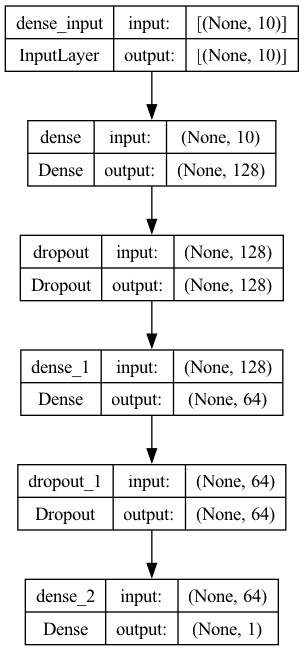

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

# Definiendo los datos
X = Sample[['RRI', 'SDNN', 'HR', 'HR_std', 'NN50', 'pNN50', 'HF', 'LF', 'Total_power', 'LF_HF']]
y = Sample['Seizure_1']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creando el modelo de red neuronal
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Capa de entrada y primera capa oculta
    layers.Dropout(0.2),  # Capa de dropout para regularización
    layers.Dense(64, activation='relu'),  # Segunda capa oculta
    layers.Dropout(0.2),  # Otra capa de dropout
    layers.Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilando el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Utilizamos binary_crossentropy porque es un problema de clasificación binaria
              metrics=['accuracy'])

# Definiendo el callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Entrenando el modelo con el callback de EarlyStopping
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluando el modelo
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()  # Convertir las predicciones a 0s y 1s
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión de la red neuronal: {accuracy}")
print(classification_report(y_test, y_pred))
# Calculando la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calculando la especificidad
# Especificidad = TN / (TN + FP)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Especificidad: {specificity}")

# Visualizar la arquitectura del modelo
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [14]:
from tensorflow.keras.callbacks import TensorBoard

# Crear una instancia del callback TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs")

# Entrenar el modelo con el callback de TensorBoard
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, callbacks=[early_stopping, tensorboard_callback])


Epoch 1/5
2956/2956 [==============================] - 6s 2ms/step - loss: 0.1378 - accuracy: 0.9466 - val_loss: 0.0839 - val_accuracy: 0.9743
Epoch 2/5
2956/2956 [==============================] - 6s 2ms/step - loss: 0.1324 - accuracy: 0.9490 - val_loss: 0.0829 - val_accuracy: 0.9719
Epoch 3/5
2956/2956 [==============================] - 6s 2ms/step - loss: 0.1293 - accuracy: 0.9501 - val_loss: 0.0839 - val_accuracy: 0.9706
Epoch 4/5
2956/2956 [==============================] - 6s 2ms/step - loss: 0.1255 - accuracy: 0.9521 - val_loss: 0.0842 - val_accuracy: 0.9697
Epoch 5/5
2956/2956 [==============================] - 6s 2ms/step - loss: 0.1248 - accuracy: 0.9520 - val_loss: 0.0754 - val_accuracy: 0.9758


924/924 [==============================] - 1s 978us/step


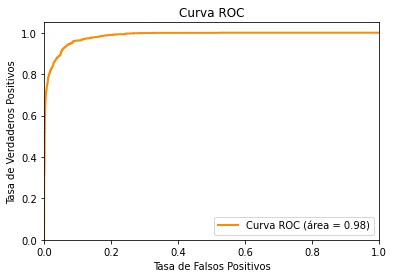

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = model.predict(X_test)  # Obtener probabilidades en lugar de clases
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.model_selection import KFold

# Tu función para crear el modelo:
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Definir StratifiedKFold para la validación cruzada:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

# Uso de k-fold en X_train y y_train
for train_idx, test_idx in kfold.split(X_train, y_train):
    model = create_model()
    model.fit(X_train[train_idx], y_train.iloc[train_idx], epochs=100, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_train[test_idx], y_train.iloc[test_idx], verbose=0)
    scores.append(accuracy)
    # Predicciones para el fold actual
    y_pred_fold = model.predict(X_train[test_idx])
    y_pred_fold = np.round(y_pred_fold).flatten()

    # Matriz de confusión para el fold actual
    cm_fold = confusion_matrix(y_train.iloc[test_idx], y_pred_fold)

    # Especificidad para el fold actual
    tn_fold, fp_fold, fn_fold, tp_fold = cm_fold.ravel()
    specificity_fold = tn_fold / (tn_fold + fp_fold)

    # Puedes almacenar cada especificidad en una lista si quieres
    specificities.append(specificity_fold)


print(f"Precision media: {np.mean(scores)}, Desviación estándar: {np.std(scores)}")
print(f"Especificidad media: {np.mean(specificities)}")


739/739 [==============================] - 1s 942us/step


NameError: name 'specificities' is not defined

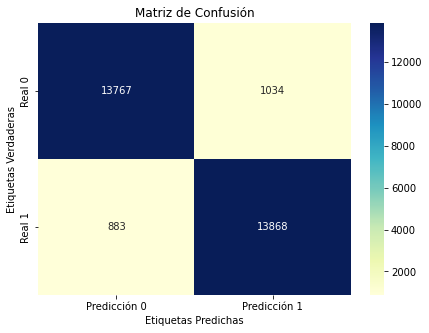

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Convertir la matriz de confusión a DataFrame para etiquetar fácilmente los ejes
cm_df = pd.DataFrame(cm, index=['Real 0', 'Real 1'], columns=['Predicción 0', 'Predicción 1'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt="g")  # fmt="g" para evitar notación científica
plt.title('Matriz de Confusión')
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.show()

In [49]:
# Función para hacer predicciones con el modelo
def predict_with_model(model, data, scaler):
    # Escalar los datos
    data_scaled = scaler.transform(data)
    predictions = model.predict(data_scaled)
    return np.round(predictions).flatten()

# Usando la función de predicción
predictors = ['RRI', 'SDNN', 'HR', 'HR_std', 'NN50', 'pNN50', 'HF', 'LF', 'Total_power', 'LF_HF']
X_new = data1[predictors].values

print(X_new)

results = predict_with_model(model, X_new, scaler)
print(results)


[[6.28000000e+02 2.18477936e+01 9.20000000e+01 ... 3.41263828e+01
  2.49789057e+02 3.13659384e-01]
 [6.78000000e+02 4.12332673e+01 9.30000000e+01 ... 1.74922370e+01
  2.52425314e+02 1.29462829e-01]
 [6.42000000e+02 1.91213668e+01 9.20000000e+01 ... 2.45223848e+01
  4.41868074e+02 4.61408165e-01]
 ...
 [9.85000000e+02 2.11223116e+02 5.60000000e+01 ... 7.68281576e+04
  2.09861118e+05 5.18790922e+00]
 [1.00500000e+03 2.23343463e+02 5.60000000e+01 ... 7.45265287e+04
  2.02095716e+05 5.29082895e+00]
 [1.01500000e+03 2.10982109e+02 5.60000000e+01 ... 6.27470183e+04
  1.71624444e+05 4.84651811e+00]]
[[-0.5611015  -0.64328279  0.90380374 ... -0.50868502 -0.18793282
  -0.75463779]
 [-0.46153054 -0.56012357  0.95659737 ... -0.50935211 -0.18793081
  -0.82473114]
 [-0.53322163 -0.65497854  0.90380374 ... -0.50907018 -0.1877869
  -0.69841412]
 ...
 [ 0.1498352   0.16909379 -0.9967669  ...  2.57103533 -0.02870043
   1.10018779]
 [ 0.18966358  0.2210873  -0.9967669  ...  2.47873163 -0.03459946
   1.1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


579/579 [==============================] - 0s 677us/step
[[0.98625433]
 [0.99978125]
 [0.99270296]
 ...
 [0.99846685]
 [0.9985548 ]
 [0.99633783]]
[1. 1. 1. ... 1. 1. 1.]


In [31]:
model_name = "mi_modelo"
model_path = 'saved_model/{}/00000001'.format(model_name)
model.save(model_path)



INFO:tensorflow:Assets written to: saved_model/mi_modelo/00000001/assets


INFO:tensorflow:Assets written to: saved_model/mi_modelo/00000001/assets


In [32]:
import tarfile
import os

with tarfile.open('model.tar.gz', 'w:gz') as tar:
    tar.add(model_path, arcname=os.path.basename(model_path))

In [10]:
data = pd.read_csv(mainpath+filename, sep=",")
data1 = data[data["Seizure"] == 1]
data1

,ECG,Time,Seizure,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF
1001,-30.20,2022-07-01 13:24:34.860,1,688,19.612921,93,0.485789,0,0.000000,169.131604,29.649778,256.363871,0.175306
1002,-63.00,2022-07-01 13:24:23.960,1,662,17.800482,92,0.460771,0,0.000000,109.762212,34.134077,248.994014,0.310982
1003,22.43,2022-07-01 13:24:53.560,1,748,42.903300,92,0.584559,5,18.518519,71.844402,352.320959,913.045248,4.903944
1004,-30.20,2022-07-01 13:24:39.000,1,660,21.847794,92,0.494912,0,0.000000,135.475659,17.309706,255.151693,0.127770
1005,-399.87,2022-07-01 13:25:01.720,1,664,120.946534,89,1.009367,13,39.393939,344.949879,710.820041,2802.732702,2.060647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221394,-46.66,2022-07-02 02:14:23.700,1,965,261.964420,56,0.872015,8,40.000000,28516.686508,82649.829603,271189.177019,2.898297
221395,37.71,2022-07-02 02:14:53.900,1,990,211.557162,54,0.731291,10,55.555556,9303.026920,46109.059704,115919.652485,4.956350
221396,21.69,2022-07-02 02:14:45.650,1,1075,215.774180,55,0.610552,8,47.058824,9757.943861,52101.603623,139917.462228,5.339404
221397,40.07,2022-07-02 02:14:31.750,1,970,201.690475,55,0.894452,7,35.000000,14812.718087,76826.325186,209869.283127,5.186511


         ECG                     Time  Seizure  RRI       SDNN  HR    HR_std  \
1002  111.64  2022-07-01 13:24:38.080        1  678  41.233267  93  0.574147   

      NN50      pNN50          HF         LF  Total_power     LF_HF  
1002     4  15.384615  135.113971  17.492237   252.425314  0.129463  
{'predictions': [[0.999781251]]}
0.999781251
{'predictions': [[0.992702961]]}
0.992702961
{'predictions': [[0.998618484]]}
0.998618484
{'predictions': [[0.999419093]]}
0.999419093
[1, 1, 1, 1]


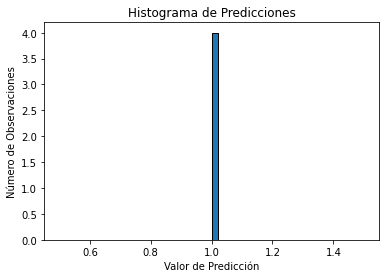

In [67]:
import sagemaker
from sagemaker.tensorflow import TensorFlowPredictor


# Define el nombre del endpoint
endpoint_name = 'tensorflow-inference-2023-09-02-23-00-24-140'  # Cambia esto al nombre real del endpoint

# Crea un predictor
predictor = TensorFlowPredictor(endpoint_name=endpoint_name)

# Usa el predictor para obtener una predicción
#input_data = [618, 25.65814159063469, 97, 0.652648986464887, 2, 6.896551724137931, 12462.459981061436, 9715.511213369073, 41987.7445303172, 0.7795821393314996]
predictors = ['RRI', 'SDNN', 'HR', 'HR_std', 'NN50', 'pNN50', 'HF', 'LF', 'Total_power', 'LF_HF']
X_new = data1[predictors][1:5]
print(data1[1:2])

# Escala los datos usando el scaler del entrenamiento
X_scaled = scaler.transform(X_new)

# Usa el predictor para obtener las predicciones de validación
results = []
for row in X_scaled:
    raw_result = predictor.predict(row.tolist())
    print(raw_result)
    prediction_value = raw_result['predictions'][0][0]
    print(prediction_value)
    rounded_result = round(prediction_value)
    results.append(rounded_result)
    
print(results)

# Dibuja un histograma de las predicciones
plt.hist(results, bins=50, edgecolor='k')
plt.title("Histograma de Predicciones")
plt.xlabel("Valor de Predicción")
plt.ylabel("Número de Observaciones")
plt.show()

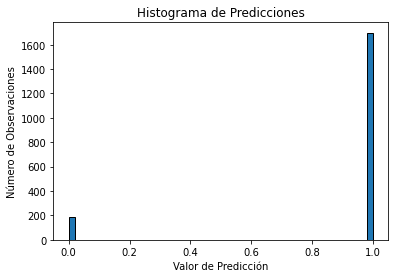

In [56]:
# Dibuja un histograma de las predicciones
plt.hist(results, bins=50, edgecolor='k')
plt.title("Histograma de Predicciones")
plt.xlabel("Valor de Predicción")
plt.ylabel("Número de Observaciones")
plt.show()

In [62]:
from joblib import dump

# Guardar el scaler en un archivo
dump(scaler, 'scaler_filename.pkl')

['scaler_filename.pkl']

In [68]:
data1.head()

,ECG,Time,Seizure,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF
1001,-25.66,2022-07-01 13:24:24.760,1,628,21.847794,92,0.496101,0,0.000000,108.800771,34.126383,249.789057,0.313659
1002,111.64,2022-07-01 13:24:38.080,1,678,41.233267,93,0.574147,4,15.384615,135.113971,17.492237,252.425314,0.129463
1003,-42.29,2022-07-01 13:24:18.120,1,642,19.121367,92,0.489230,0,0.000000,53.146838,24.522385,441.868074,0.461408
1004,-4.06,2022-07-01 13:24:50.140,1,660,120.469669,92,1.299070,13,39.393939,40.416363,149.484771,593.815833,3.698620
1005,19.95,2022-07-01 13:24:34.200,1,654,41.927220,93,0.512531,5,19.230769,168.454661,31.792269,253.399146,0.188729
